In [1]:
import json
from pprint import pprint
import time
import codecs
import sys
import io

import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import meetup.api as meet


In [2]:
# https://meetup-api.readthedocs.io/en/latest/
#         meetup_api.html#meetup.api.meetup.api.Client.GetCities
# page tells us how to use functions of the meetup.api package




In [3]:
dir(meet)

['API_DEFAULT_URL',
 'API_KEY_ENV_NAME',
 'API_SERVICE_FILES',
 'API_SPEC_DIR',
 'Client',
 'DEFAULT_WAIT_TIME',
 'MeetupObject',
 'MeetupObjectList',
 'RateLimit',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'exceptions',
 'json',
 'os',
 'partial',
 'requests',
 'six',
 'sleep']

In [7]:
client = meetup.api.Client('65615f7d6e7c581a5e2128181351179')
group_info = client.GetGroup({'urlname': 'Meetup-API-Testing'})
type(group_info)



NameError: name 'meetup' is not defined

In [ ]:
group_info.__dict__.keys()

In [8]:
url= 'https://api.meetup.com/2/cities?&sign=true&photo-host=public&page=50'
response = requests.get(url).json()
response

{'results': [{'zip': '44101',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 3.5582075499246173,
   'city': 'Cleveland',
   'lon': -81.66999816894531,
   'ranking': 0,
   'id': 44101,
   'state': 'OH',
   'member_count': 13715,
   'lat': 41.4900016784668},
  {'zip': '44301',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 32.60191232986632,
   'city': 'Akron',
   'lon': -81.5199966430664,
   'ranking': 1,
   'id': 44301,
   'state': 'OH',
   'member_count': 4700,
   'lat': 41.040000915527344},
  {'zip': '44501',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 56.70637031428488,
   'city': 'Youngstown',
   'lon': -80.66000366210938,
   'ranking': 2,
   'id': 44501,
   'state': 'OH',
   'member_count': 1620,
   'lat': 41.099998474121094},
  {'zip': '44107',
   'country': 'us',
   'localized_country_name': 'USA',
   'distance': 9.747807472185995,
   'city': 'Lakewood',
   'lon': -81.79000091552734,
   'ranking': 3,
   '

In [ ]:
print(json.dumps(response, indent=4, sort_keys=True))

In [6]:
print(type(response))
print(response.keys())

NameError: name 'response' is not defined

In [14]:
lat = []
lon = []
city = []
zipc = []
member_count = []

for i in response['results']:
    a = i['lat']
    b = i['lon']
    c = i['zip']
    d = i['city']
    e = i['member_count']
    lat.append(a)
    lon.append(b)
    city.append(d)
    zipc.append(c)
    member_count.append(e)
    
    
df_master = pd.DataFrame({'Latitude':lat,
                          'Longitude':lon,
                          'Zip Code':zipc,
                          'Member Count':member_count,
                          'city': city})
                         
                        
                        
df_master.head()                    


,Latitude,Longitude,Zip Code,Member Count,city
0,41.490002,-81.669998,44101,13715,Cleveland
1,41.040001,-81.519997,44301,4700,Akron
2,41.099998,-80.660004,44501,1620,Youngstown
3,41.480000,-81.790001,44107,1002,Lakewood
4,41.130001,-81.860001,44256,752,Medina


In [10]:
url2= 'https://api.meetup.com/find/groups?photo-host=public&page=50&sig_id=48556212&sig=53db920e9a313b6570d828044374f2480410fd57'
response2 = requests.get(url2).json()

print(json.dumps(response2, indent=4, sort_keys=True))


[
    {
        "category": {
            "id": 34,
            "name": "Tech",
            "shortname": "tech",
            "sort_name": "Tech"
        },
        "city": "Cleveland",
        "country": "US",
        "created": 1284494968000,
        "description": "<p>The Cleveland Big Data and Hadoop User Group is for those interested in the distributed processing of large amounts of data, focusing heavily on the Hadoop stack.</p>\n<p>If you have more data than can comfortably fit on a single server and/or have a processing window that you can't meet processing with a single server, then you should come to our meetings!</p>\n<p>This group is industry agnostic and has a mix of classic user-group presentations (e.g., \"I tried this out and here is what happened\") as well as informative vendor sessions.</p>\n<p>Topics include networking, storage (e.g., HDFS, KeyValue storage like HBase), computation (e.g., MapReduce/YARN, graph processing), indexing/search (e.g., Solr), and analytics 

In [11]:
url3= 'https://api.meetup.com/find/topic_categories?photo-host=public&sig_id=14242943&sig=1f4d6b18fb34b7dd8a1f38e023bf34259cdbb894'
response3 = requests.get(url3).json()


In [12]:
print(json.dumps(response3, indent=4, sort_keys=True))

[
    {
        "category_ids": [
            3,
            23
        ],
        "id": 242,
        "name": "Outdoors & Adventure",
        "photo": {
            "base_url": "https://secure.meetupstatic.com",
            "highres_link": "https://secure.meetupstatic.com/photos/event/2/e/a/7/highres_450131943.jpeg",
            "id": 450131943,
            "photo_link": "https://secure.meetupstatic.com/photos/event/2/e/a/7/600_450131943.jpeg",
            "thumb_link": "https://secure.meetupstatic.com/photos/event/2/e/a/7/thumb_450131943.jpeg",
            "type": "event"
        },
        "shortname": "outdoors-adventure",
        "sort_name": "Outdoors & Adventure"
    },
    {
        "category_ids": [
            34
        ],
        "id": 292,
        "name": "Tech",
        "photo": {
            "base_url": "https://secure.meetupstatic.com",
            "highres_link": "https://secure.meetupstatic.com/photos/event/2/e/a/d/highres_450131949.jpeg",
            "id": 450131949,


In [11]:

x_axis = np.arange(len(df_master))

In [12]:
tick_locations = [value for value in x_axis]

([<matplotlib.axis.XTick at 0x20e045ec208>,
 <a list of 50 Text xticklabel objects>)

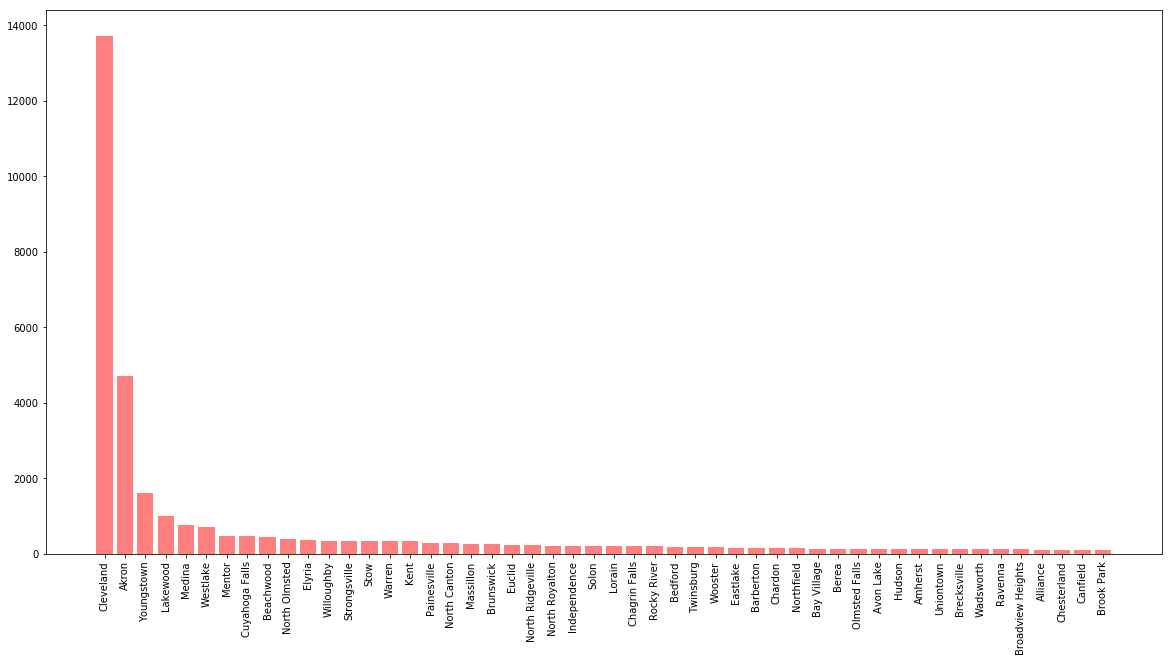

In [19]:
plt.figure(figsize=(20
                ,10))
plt.bar(x_axis, df_master["Member Count"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, df_master["city"], rotation="vertical")